# Marketing Campaigns analysis

Data set KAG_conversion_data.csv was collected from XYZ company’s social media ad campaign. 
It contains 1143 observations in 11 variables. 

The descriptions of the variables are below. 

1.) ad_id: an unique ID for each ad. \
2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company. \
3.) fbcampaignid: an ID associated with how Facebook tracks each campaign. \
4.) age: age of the person to whom the ad is shown. \
5.) gender: gender of the person to whom the add is shown \
6.) interest: a code specifying the category to which the person’s interest belongs (interests are
as mentioned in the person’s Facebook public profile). \
7.) Impressions: the number of times the ad was shown. \
8.) Clicks: number of clicks on for that ad. \
9.) Spent: Amount paid by company xyz to Facebook, to show that ad. \
10.) Total conversion: Total number of people who enquired about the product after seeing the
ad. \
11.) Approved conversion: Total number of people who bought the product after seeing the ad. \


# Explore data

In [2]:
# import and explore data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('KAG_conversion_data.csv')
df.info()
df.shape
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


# Analyse cost per acquisition for each campaign

                    Spent  Approved_Conversion  Cost per acquisition
xyz_campaign_id                                                     
916                149.71                   24                  6.24
936               2893.37                  183                 15.81
1178             55662.15                  872                 63.83




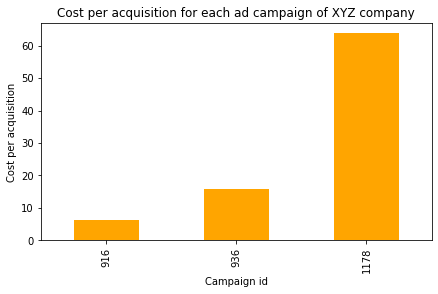

In [3]:
#Calculate Cost per acquisition
df.groupby('xyz_campaign_id')[['Spent','Approved_Conversion']].sum()

paid = df.groupby('xyz_campaign_id')['Spent'].sum().round(2)
con = df.groupby('xyz_campaign_id')['Approved_Conversion'].sum()
cpa = round(paid/con,2)
cpa_df = pd.DataFrame({'Spent':paid,'Approved_Conversion':con,'Cost per acquisition':cpa})
print(cpa_df)
print("\n")
#print(cpa_df.describe())
ax = cpa_df['Cost per acquisition'].plot(kind='bar',
                                    color='orange',
                                    figsize=(7,4),
                                    title = "Cost per acquisition for each ad campaign of XYZ company")
ax.set_xlabel("Campaign id")
ax.set_ylabel("Cost per acquisition")
plt.show()

Cost per acquisition for each campaign can be defined by Spent/Approved Conversion.
The analysis revealed that campaign id 1178 had the highest cost per acquisition of 63.83 unit per customer.
However, campaign id 1178 spent the most money on advertising.


   Campaign 916
count    54.000000
mean      2.772407
std       3.990071
min       0.000000
25%       0.000000
50%       1.450000
75%       3.057500
max      18.070000
Name: Spent, dtype: float64

   Campaign 936
count    464.000000
mean       6.235711
std       16.287179
min        0.000000
25%        0.000000
50%        1.385000
75%        4.605000
max      180.220001
Name: Spent, dtype: float64

   Campaign 1178
count    625.000000
mean      89.059440
std      102.386480
min        0.000000
25%       19.110000
50%       48.549999
75%      120.879999
max      639.949998
Name: Spent, dtype: float64


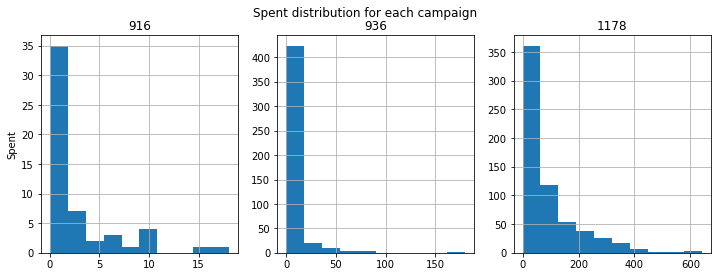


   Campaign 916
count    54.000000
mean      0.444444
std       0.501570
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Approved_Conversion, dtype: float64

   Campaign 936
count    464.000000
mean       0.394397
std        0.539629
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Approved_Conversion, dtype: float64

   Campaign 1178
count    625.000000
mean       1.395200
std        2.199718
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       21.000000
Name: Approved_Conversion, dtype: float64


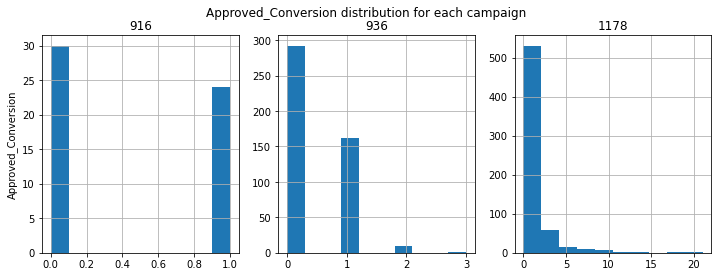

In [4]:
#Explore Distribution of Spent for each campaign
fig = plt.figure(figsize=(12,4))
plt.suptitle('Spent distribution for each campaign')
ax=plt.subplot("131")
df[df['xyz_campaign_id']==916]['Spent'].hist(ax=ax)
ax.set_title("916")
ax.set_ylabel("Spent")
print("\n   Campaign 916")
print(df[df['xyz_campaign_id']==916]['Spent'].describe())

ax=plt.subplot("132")
df[df['xyz_campaign_id']==936]['Spent'].hist(ax=ax)
ax.set_title("936")
print("\n   Campaign 936")
print(df[df['xyz_campaign_id']==936]['Spent'].describe())

ax=plt.subplot("133")
df[df['xyz_campaign_id']==1178]['Spent'].hist(ax=ax)
ax.set_title("1178")
print("\n   Campaign 1178")
print(df[df['xyz_campaign_id']==1178]['Spent'].describe())

plt.show()

#Explore Distribution of Approved_Conversion for each campaign
fig = plt.figure(figsize=(12,4))
plt.suptitle('Approved_Conversion distribution for each campaign')
ax=plt.subplot("131")
df[df['xyz_campaign_id']==916]['Approved_Conversion'].hist(ax=ax)
ax.set_title("916")
ax.set_ylabel("Approved_Conversion")
print("\n   Campaign 916")
print(df[df['xyz_campaign_id']==916]['Approved_Conversion'].describe())

ax=plt.subplot("132")
df[df['xyz_campaign_id']==936]['Approved_Conversion'].hist(ax=ax)
ax.set_title("936")
print("\n   Campaign 936")
print(df[df['xyz_campaign_id']==936]['Approved_Conversion'].describe())

ax=plt.subplot("133")
df[df['xyz_campaign_id']==1178]['Approved_Conversion'].hist(ax=ax)
ax.set_title("1178")
print("\n   Campaign 1178")
print(df[df['xyz_campaign_id']==1178]['Approved_Conversion'].describe())

plt.show()

By analysing histograms \
The spent distribution histogram show that data for all campaigns are skewed to the right. \
From two histograms, they shows that most of advertisings have small payout and get small of customers.


Campaign 916 had the lowest approved conversion because it spent less money on advertising than others.


Campaign 1179 had the most approved conversion because it spent the most money on advertising.
This campaign had the highest cost per acquisition. It can be implied that this campaign gained a lot of customer because of frequencly advertise.

# Analyse click-through rate for each campaign

                 Clicks  Impression  Click-through rate
xyz_campaign_id                                        
916                 113      482925            0.023399
936                1984     8128187            0.024409
1178              36068   204823716            0.017609


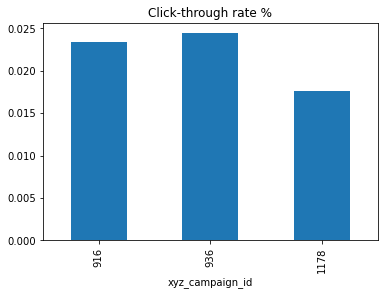

In [5]:
#Click-through rate >> (Clicks/Impression)*100
df.head()
df.groupby('xyz_campaign_id')[['Impressions','Clicks']].sum()
click = df.groupby('xyz_campaign_id')['Clicks'].sum()
Imp = df.groupby('xyz_campaign_id')['Impressions'].sum()
ctr = (click/Imp)*100
ctr_df = pd.DataFrame({'Clicks':click,'Impression':Imp,'Click-through rate':ctr})
print(ctr_df)
ctr_df['Click-through rate'].plot(kind='bar',title="Click-through rate %")
plt.show()

The analysis reveal that Campaign 936 has the highest CTR at 0.024409%.

Campaign 916 has 0.023399% CTR and Campaign 1178 has the lowest CTR at 0.017609%.

When focusing on impression, the analysis finds that campaign 1178 has the most impression.


# Analyse Conversion Rate for each campaign

                 Approved_Conversion  Total_Conversion  Conversion rate
xyz_campaign_id                                                        
916                               24                58        41.379310
936                              183               537        34.078212
1178                             872              2669        32.671413


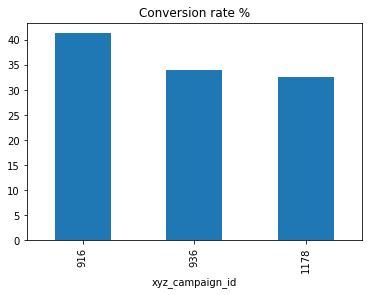

In [10]:
# Conversion rate >> (Approved_Conversion/Total_Conversion)*100
df.head()
df.groupby('xyz_campaign_id')[['Approved_Conversion','Total_Conversion']].sum()
Acon = df.groupby('xyz_campaign_id')['Approved_Conversion'].sum()
con = df.groupby('xyz_campaign_id')['Total_Conversion'].sum()
con_rate = (Acon/con)*100
con_rate_df = pd.DataFrame({'Approved_Conversion':Acon,'Total_Conversion':con,'Conversion rate':con_rate})
print(con_rate_df)
con_rate_df["Conversion rate"].plot(kind='bar',title="Conversion rate %")
plt.show()

Campaign 916 has the highest conversion rate at 41.38%.

Campaign 936 has conversion rate at 34.08% and Campaign 1178 has the lowest conversion rate at 32.67%

May reconsider to less support campaign 1178 and spend more money on campaign 916.

# Analyse Conversion rate by age and gender

In [11]:
df.head()
df.tail()
#df.describe()
#df.age.unique()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


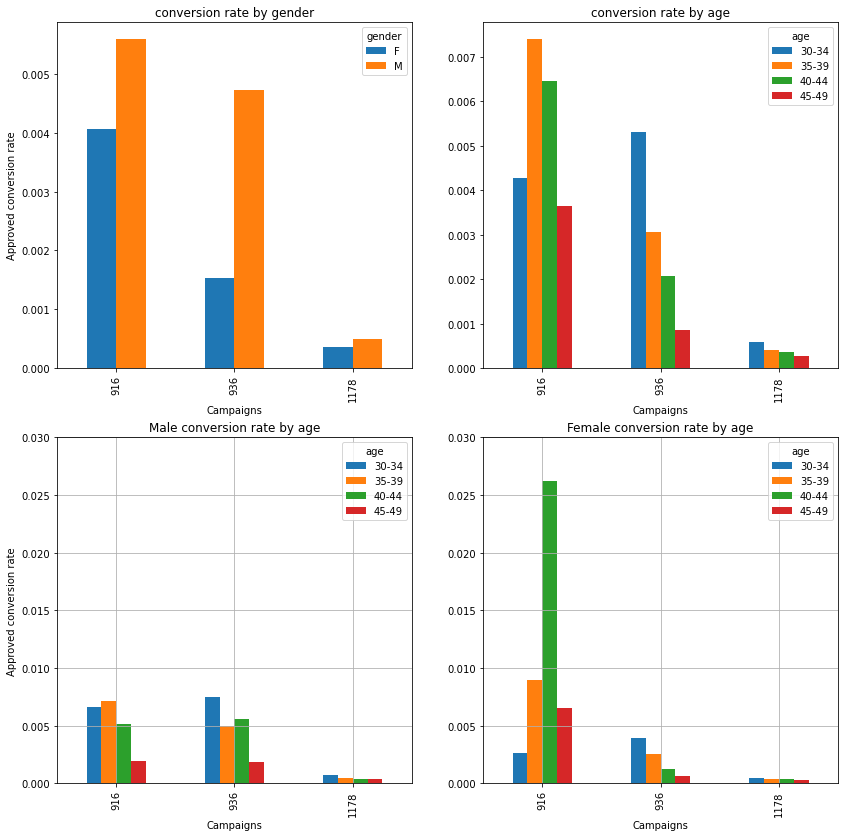

xyz_campaign_id      916       936       1178
gender age                                   
F      30-34     0.002638  0.003910  0.000500
       35-39     0.008965  0.002534  0.000350
       40-44     0.026233  0.001238  0.000357
       45-49     0.006555  0.000666  0.000249
M      30-34     0.006599  0.007441  0.000681
       35-39     0.007151  0.004930  0.000467
       40-44     0.005158  0.005551  0.000383
       45-49     0.001935  0.001852  0.000334

In [12]:
## Approved conversion rate

#Approved_conversion rate by gender

con1 = df.pivot_table('Approved_Conversion',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
Imp1 = df.pivot_table('Impressions',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
con_rate1 = (con1/Imp1)*100

fig = plt.figure(figsize=(14,14))

ax = plt.subplot("221")
con_rate1.plot(kind='bar', 
               ax=ax,
               title='conversion rate by gender')
ax.set_xlabel("Campaigns")
ax.set_ylabel("Approved conversion rate")

#Approved_conversion rate by age

con2 = df.pivot_table('Approved_Conversion',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
Imp2 = df.pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
con_rate2 = (con2/Imp2)*100

ax = plt.subplot("222")

con_rate2.plot(kind='bar',
               ax = ax,
               title='conversion rate by age')
ax.set_xlabel("Campaigns")


#Male-age con rate for each campaign
m_con = df[df['gender']=='M'].pivot_table('Approved_Conversion',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
m_Imp = df[df['gender']=='M'].pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
m_con_rate = (m_con/m_Imp)*100

ax = plt.subplot("223")
m_ax = m_con_rate.plot(kind='bar',
                       ax = ax,
                       title='Male conversion rate by age',
                       grid=True)
m_ax.set_ylim(ymax = 0.03, ymin = 0)
ax.set_xlabel("Campaigns")
ax.set_ylabel("Approved conversion rate")

#Female-age con rate for each campaign
f_con = df[df['gender']=='F'].pivot_table('Approved_Conversion',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
f_Imp = df[df['gender']=='F'].pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
f_con_rate = (f_con/f_Imp)*100
ax = plt.subplot("224")
f_ax = f_con_rate.plot(kind='bar',
                    title='Female conversion rate by age',
                    ax=ax,
                    grid=True)
f_ax.set_ylim(ymax = 0.03, ymin = 0)
ax.set_xlabel("Campaigns")
plt.show()

#conversion rate gender and age for each campaign
con = df.pivot_table('Approved_Conversion',['gender','age'],['xyz_campaign_id'],margins=False,aggfunc='sum')
Imp = df.pivot_table('Impressions',['gender','age'],['xyz_campaign_id'],margins=False,aggfunc='sum')
con_rate = (con/Imp)*100
con_rate

The analysis of approved conversion rate for each campaign by age and gender.

From top left graph, the conversion rate by gender shows that males have approved conversion rate more than females.

From top right graph, the conversion rate by age shows that Campign 916 has a good result for people in age group 35 to 44 years.

From bottom left graph, Male conversion rate by age shows that Campaing 916 and 936 have higher conversion rate than Campaign 1178.
 
From bottom right graph, Female conversion rate by age shows that age has a huge effect on conversion rate for female.

Females in age group 40 to 44 has a incredible high conversion rate on Campaign 916. 
This age group must be the terget for this campaign.


# Analyse Click-through rate 

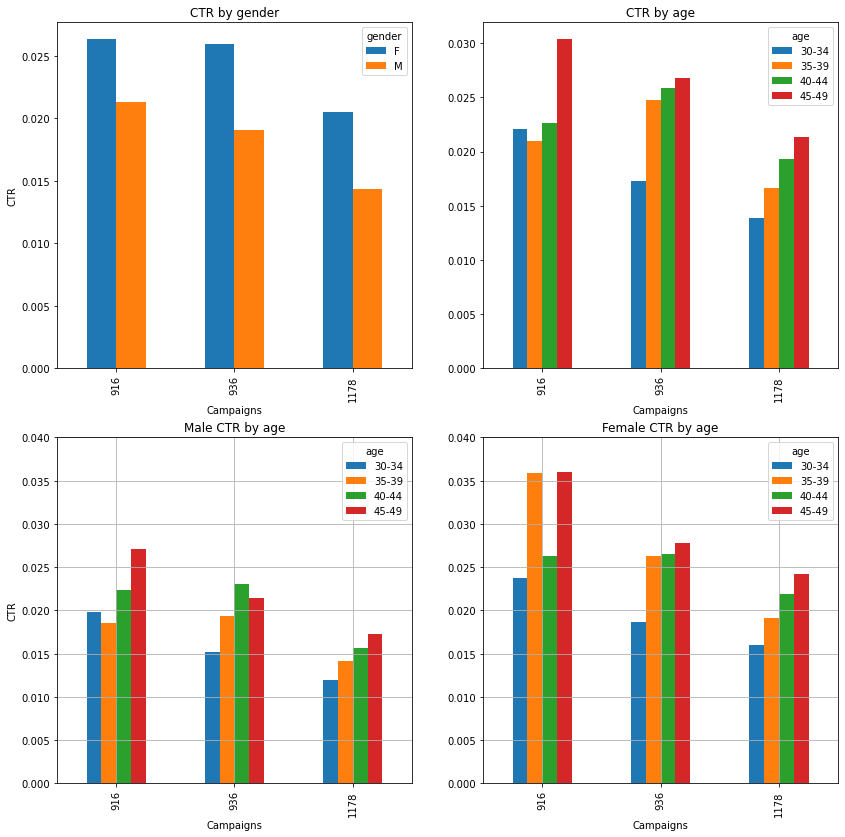

xyz_campaign_id      916       936       1178
gender age                                   
F      30-34     0.023746  0.018648  0.016031
       35-39     0.035858  0.026259  0.019110
       40-44     0.026233  0.026511  0.021937
       45-49     0.036053  0.027843  0.024215
M      30-34     0.019798  0.015185  0.011956
       35-39     0.018592  0.019310  0.014117
       40-44     0.022350  0.023058  0.015657
       45-49     0.027085  0.021371  0.017318

In [14]:
## Click-through rate

#CTR by gender

con1 = df.pivot_table('Clicks',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
Imp1 = df.pivot_table('Impressions',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
con_rate1 = (con1/Imp1)*100

fig = plt.figure(figsize=(14,14))

ax = plt.subplot("221")
con_rate1.plot(kind='bar', 
               ax=ax,
               title='CTR by gender')
ax.set_xlabel("Campaigns")
ax.set_ylabel("CTR")

#CTR by age

con2 = df.pivot_table('Clicks',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
Imp2 = df.pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
con_rate2 = (con2/Imp2)*100

ax = plt.subplot("222")

con_rate2.plot(kind='bar',
               ax = ax,
               title='CTR by age')
ax.set_xlabel("Campaigns")


#Male-age CTR for each campaign
m_con = df[df['gender']=='M'].pivot_table('Clicks',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
m_Imp = df[df['gender']=='M'].pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
m_con_rate = (m_con/m_Imp)*100

ax = plt.subplot("223")
m_ax = m_con_rate.plot(kind='bar',
                       ax = ax,
                       title='Male CTR by age',
                       grid=True)
m_ax.set_ylim(ymax = 0.04, ymin = 0)
ax.set_xlabel("Campaigns")
ax.set_ylabel("CTR")

#Female-age con rate for each campaign
f_con = df[df['gender']=='F'].pivot_table('Clicks',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
f_Imp = df[df['gender']=='F'].pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
f_con_rate = (f_con/f_Imp)*100
ax = plt.subplot("224")
f_ax = f_con_rate.plot(kind='bar',
                    title='Female CTR by age',
                    ax=ax,
                    grid=True)
f_ax.set_ylim(ymax = 0.04, ymin = 0)
ax.set_xlabel("Campaigns")
plt.show()

#conversion rate gender and age for each campaign
con = df.pivot_table('Clicks',['gender','age'],['xyz_campaign_id'],margins=False,aggfunc='sum')
Imp = df.pivot_table('Impressions',['gender','age'],['xyz_campaign_id'],margins=False,aggfunc='sum')
ctr = (con/Imp)*100
ctr

The analysis of Click-through rate for each campaign by age and gender.

From top left graph, the Click-through rate by gender shows that females have Click-through rate more than males for all campaigns.

From top right graph, the Click-through rate by age shows that the highest CTR for all campaigns is age group 45 to 49. The older the more CTR

From bottom left graph, Male click-through rate by age shows a little different for all campaigns.
 
From bottom right graph, Female click-through rate by age shows a little different for all campaigns.

However, in Campaign 916, Females in age group 35 to 39 and 45 to 49 have higher CTR than others.

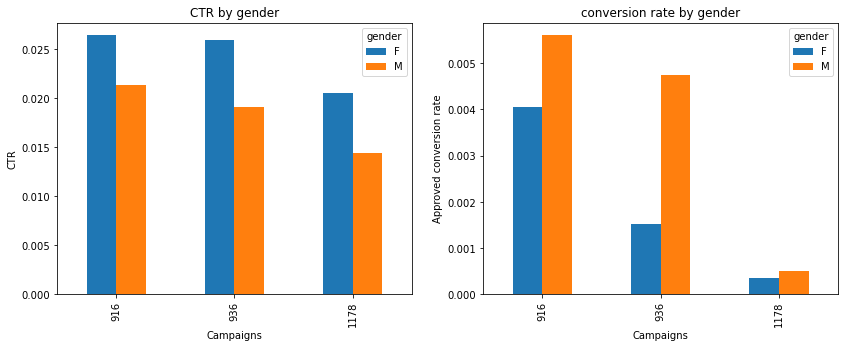

In [16]:
## Gender: Approved conversion rate and CTR

#Approved conversion rate
con1 = df.pivot_table('Approved_Conversion',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
Imp1 = df.pivot_table('Impressions',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
con_rate1 = (con1/Imp1)*100

fig = plt.figure(figsize=(14,5))

ax = plt.subplot("122")
con_rate1.plot(kind='bar', 
               ax=ax,
               title='conversion rate by gender')
ax.set_xlabel("Campaigns")
ax.set_ylabel("Approved conversion rate")

#CTR
con2 = df.pivot_table('Clicks',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
Imp2 = df.pivot_table('Impressions',['xyz_campaign_id'],['gender'],margins=False,aggfunc='sum')
con_rate2 = (con2/Imp2)*100


ax = plt.subplot("121")
con_rate2.plot(kind='bar', 
               ax=ax,
               title='CTR by gender')
ax.set_xlabel("Campaigns")
ax.set_ylabel("CTR")
plt.show()

When look at Approved conversion rate and Click-through rate by gender for all campaigns, Females have higher CTR than males,

Males have higher Approved conversion rate than females.

It can be implied that females like to click to see advertisement more than meles.

However, males trend to buy product more than females.


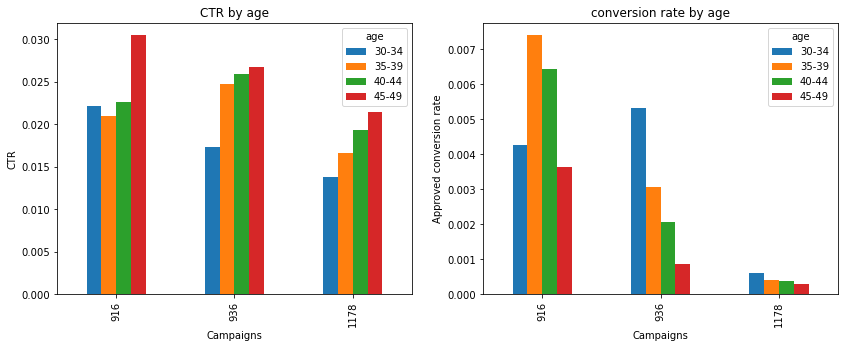

In [18]:
## Age: Approved conversion rate and CTR

#Approved conversion rate
con1 = df.pivot_table('Approved_Conversion',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
Imp1 = df.pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
con_rate1 = (con1/Imp1)*100

fig = plt.figure(figsize=(14,5))

ax = plt.subplot("122")
con_rate1.plot(kind='bar', 
               ax=ax,
               title='conversion rate by age')
ax.set_xlabel("Campaigns")
ax.set_ylabel("Approved conversion rate")

#CTR
con2 = df.pivot_table('Clicks',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
Imp2 = df.pivot_table('Impressions',['xyz_campaign_id'],['age'],margins=False,aggfunc='sum')
con_rate2 = (con2/Imp2)*100


ax = plt.subplot("121")
con_rate2.plot(kind='bar', 
               ax=ax,
               title='CTR by age')
ax.set_xlabel("Campaigns")
ax.set_ylabel("CTR")
plt.show()

Approved conversion rate and Click-through rate by age, 
the older the higher CTR, the younger the higher Approved conversion rate.